In [4]:
# Import package
%matplotlib notebook
import h5py
import numpy as np
import sigpy.plot as pl
import sigpy as sp
import cfl
import matplotlib.pyplot as plt

In [5]:
#read dataset: brain dataset
h5_dataset_brain = h5py.File('rawdata_brain_radial_96proj_12ch.h5', 'r')

In [150]:
kl = kspace_low_dim.transpose(1,2,0)[:,:,None,:]

In [151]:
kl.shape

(300, 300, 1, 12)

In [152]:
cfl.writecfl(array=kl,name="low_res")

In [153]:
sens = cfl.readcfl("sens_low")

In [156]:
sens_map = sens[:,:,0,:,0].transpose(2,0,1)

<IPython.core.display.Javascript object>


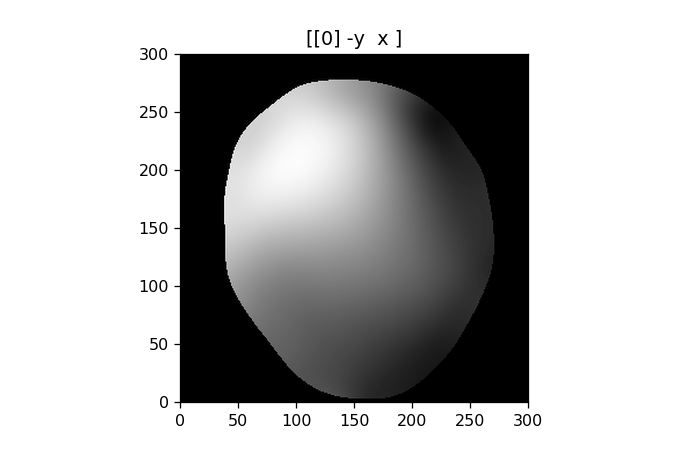

In [157]:
pl.ImagePlot(sens_map)

<IPython.core.display.Javascript object>


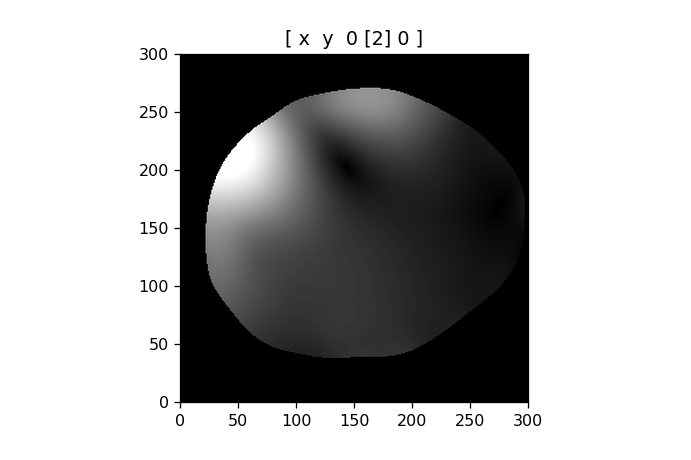

In [155]:
pl.ImagePlot(sens)

In [132]:
rawdata.shape

(1, 512, 96, 12)

In [54]:
h5_dataset_rawdata_name = list(h5_dataset_brain.keys())[0]
h5_dataset_trajectory_name = list(h5_dataset_brain.keys())[1]

trajectory = h5_dataset_brain.get(h5_dataset_trajectory_name).value
rawdata = h5_dataset_brain.get(h5_dataset_rawdata_name).value

In [16]:
gpu_number = 0

In [62]:
type(phase)

cupy.core.core.ndarray

In [99]:
coor = trajectory[:2,:,:].transpose((1,2,0))
phase = np.exp(1j*np.pi*(0.1)*coor[:,:,0][None,:,:])
# phase = sp.backend.to_device(phase,gpu_number)
rawdata_brain = rawdata[0,:,:,:].transpose((2,0,1))*phase
coor = sp.backend.to_device(coor,gpu_number)
rawdata_brain = sp.backend.to_device(rawdata_brain,gpu_number)
# image = cfl.readcfl("img_igrid_brain")
# image_sos = sp.util.rss(image,3)
# sens_maps = image[:,:,0,:]/image_sos
# sens_maps_t = sens_maps.transpose((2,0,1))
# sens_maps_t = sp.backend.to_device(sens_maps_t,gpu_number)

In [100]:
rate = 0.25
cc1 = coor[256-256*rate:256+256*rate,:,:]
raw_low = rawdata_brain[:,256-256*rate:256+256*rate,:]

In [101]:
type(raw_low)

cupy.core.core.ndarray

In [102]:
raw_1 = raw_low[0,:,:][None,:,:]

In [103]:
NUFFT_low.ishape

[1, 75, 75]

In [108]:
import cupy as cp

In [110]:
kspace_low_dim = cp.zeros((12,300,300),dtype=cp.complex)

In [112]:
for j in range(12):
    print(j)
    raw_1 = raw_low[j,:,:][None,:,:]
    NUFFT_low = sp.linop.NUFFT((1,int(300*rate),int(300*rate)),cc1)
    lamda_l2 = 0.1
    proxg_l2 = sp.prox.L2Reg((1,int(300*rate),int(300*rate)),lamda_l2)
    img_rec_loww = sp.app.LinearLeastSquares(NUFFT_low,raw_1,proxg=proxg_l2,max_iter=100).run()
    kspace_low_dim[j,150-38:150+37,150-38:150+37] = sp.fft(img_rec_loww)[0,:,:]



MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s, max_eig=2.83E+02]

MaxEig:   3%|▎         | 1/30 [00:00<00:01, 22.71it/s, max_eig=7.41E+01]

MaxEig:   7%|▋         | 2/30 [00:00<00:01, 27.52it/s, max_eig=1.51E+02]

MaxEig:  10%|█         | 3/30 [00:00<00:00, 31.41it/s, max_eig=1.57E+02]

MaxEig:  13%|█▎        | 4/30 [00:00<00:00, 33.76it/s, max_eig=1.57E+02]

MaxEig:  17%|█▋        | 5/30 [00:00<00:00, 41.64it/s, max_eig=1.57E+02]

MaxEig:  17%|█▋        | 5/30 [00:00<00:00, 41.64it/s, max_eig=1.57E+02]

MaxEig:  20%|██        | 6/30 [00:00<00:00, 41.64it/s, max_eig=1.57E+02]

0




MaxEig:  23%|██▎       | 7/30 [00:00<00:00, 41.64it/s, max_eig=1.57E+02]

MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 41.64it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 41.64it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 41.83it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 41.83it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 41.83it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 41.83it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 41.83it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 40.56it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 40.56it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 40.56it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 40.56it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 40.56it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 1

1




MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 43.59it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 42.16it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 42.16it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 42.16it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 42.16it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 42.16it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 42.16it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 42.92it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 42.92it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 42.92it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 42.92it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 42.92it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 42.92it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 1

2




MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 43.21it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 43.21it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 43.80it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 43.80it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 43.80it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 43.80it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 43.80it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 43.80it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 44.08it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 44.08it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 44.08it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 44.08it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 44.08it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 

3




MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 45.66it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 45.66it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 44.74it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 44.74it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 44.74it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 44.74it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 44.74it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 44.74it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 44.73it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 44.73it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 44.73it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 44.73it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 44.73it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 

4




MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 39.89it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 41.08it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 41.08it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 41.08it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 41.08it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 41.08it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 41.08it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 42.10it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 42.10it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 42.10it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 42.10it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 42.10it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 42.10it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 1

5


MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 46.51it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 46.51it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 45.82it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 45.82it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 45.82it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 45.82it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 45.82it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 45.82it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 44.50it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 44.50it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 44.50it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 44.50it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 44.50it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 19

6




MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 52.42it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 52.42it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 51.96it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 51.96it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 51.96it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 51.96it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 51.96it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 51.96it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 48.54it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 48.54it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 48.54it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 19/30 [00:00<00:00, 48.54it/s, max_eig=1.57E+02]

MaxEig:  67%|██████▋   | 20/30 [00:00<00:00, 48.54it/s, max_eig=1.57E+02]

MaxEig:  70%|███████   

7




MaxEig:  30%|███       | 9/30 [00:00<00:00, 45.96it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 45.62it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 45.62it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 45.62it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 45.62it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 45.62it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 45.62it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 45.20it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 45.20it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 45.20it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 45.20it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 45.20it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 19/30 [00:00<00:00, 45.20it/s, max_eig=1.57E+02]

MaxEig:  67%|██████▋   |

8


MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 46.69it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 46.69it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 45.64it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 45.64it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 45.64it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 45.64it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 45.64it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 45.64it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 45.63it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 45.63it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 45.63it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 45.63it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 45.63it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 19

9




MaxEig:  30%|███       | 9/30 [00:00<00:00, 47.76it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 46.73it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 46.73it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 46.73it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 46.73it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 46.73it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 46.73it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 46.47it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 46.47it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 46.47it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 46.47it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 46.47it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 19/30 [00:00<00:00, 46.47it/s, max_eig=1.57E+02]

MaxEig:  67%|██████▋   |

10




MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 41.92it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 41.92it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 42.97it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 42.97it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 42.97it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 42.97it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 42.97it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 41.89it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 41.89it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 41.89it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 41.89it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 41.89it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 41.89it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 

11




MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 47.47it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 44.09it/s, max_eig=1.57E+02]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 44.09it/s, max_eig=1.57E+02]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 44.09it/s, max_eig=1.57E+02]

MaxEig:  37%|███▋      | 11/30 [00:00<00:00, 44.09it/s, max_eig=1.57E+02]

MaxEig:  40%|████      | 12/30 [00:00<00:00, 44.09it/s, max_eig=1.57E+02]

MaxEig:  43%|████▎     | 13/30 [00:00<00:00, 44.09it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 45.45it/s, max_eig=1.57E+02]

MaxEig:  47%|████▋     | 14/30 [00:00<00:00, 45.45it/s, max_eig=1.57E+02]

MaxEig:  50%|█████     | 15/30 [00:00<00:00, 45.45it/s, max_eig=1.57E+02]

MaxEig:  53%|█████▎    | 16/30 [00:00<00:00, 45.45it/s, max_eig=1.57E+02]

MaxEig:  57%|█████▋    | 17/30 [00:00<00:00, 45.45it/s, max_eig=1.57E+02]

MaxEig:  60%|██████    | 18/30 [00:00<00:00, 45.45it/s, max_eig=1.57E+02]

MaxEig:  63%|██████▎   | 1

In [117]:
import sigpy.mri

In [126]:
sens_map = sigpy.mri.espirit_maps(ksp=kspace_low_dim,device=gpu_number)

<IPython.core.display.Javascript object>


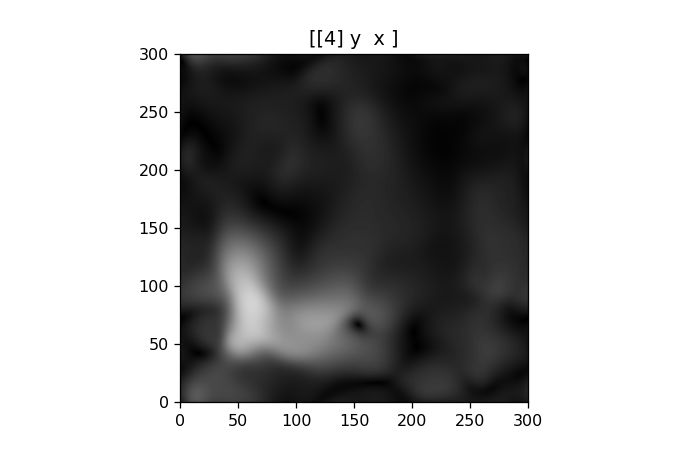

In [128]:
pl.ImagePlot(sens_map)

In [158]:
fft_low_dim = sp.ifft(kspace_low_dim,axes=[-2,-1])

<IPython.core.display.Javascript object>


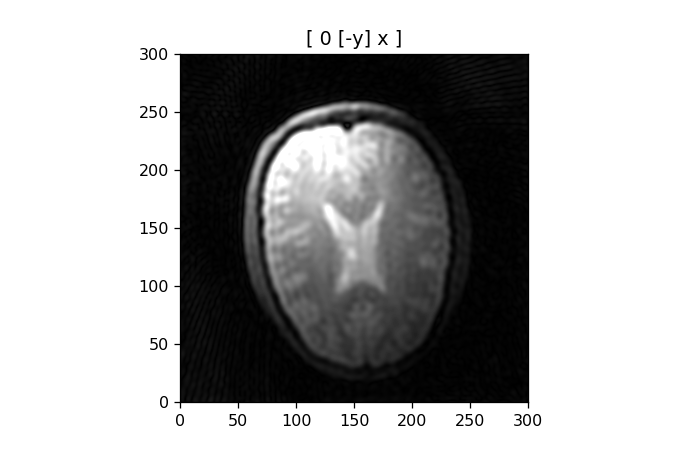

In [159]:
pl.ImagePlot(fft_low_dim)

<IPython.core.display.Javascript object>


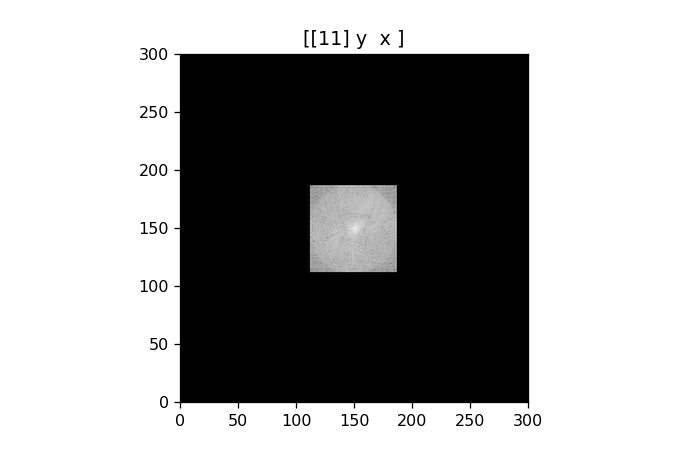

In [114]:
pl.ImagePlot(kspace_low_dim)

<IPython.core.display.Javascript object>


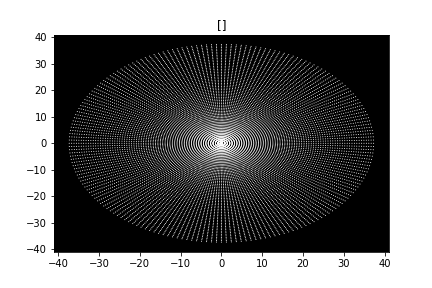

In [83]:
pl.ScatterPlot(cc1)

In [ ]:
ses_maps_

In [18]:
S = sp.linop.Multiply((1,300,300),sens_maps_t)
NUFFT = sp.linop.NUFFT((12,300,300),coor)
Operator = NUFFT*S

In [19]:
W = sp.linop.Wavelet((1,300,300),axes = [-1,-2])
lamda = 0.000001
proxg = sp.prox.UnitaryTransform(sp.prox.L1Reg(W.oshape, lamda), W)

In [22]:
phase

array(-1.+1.2246468e-16j)

<IPython.core.display.Javascript object>


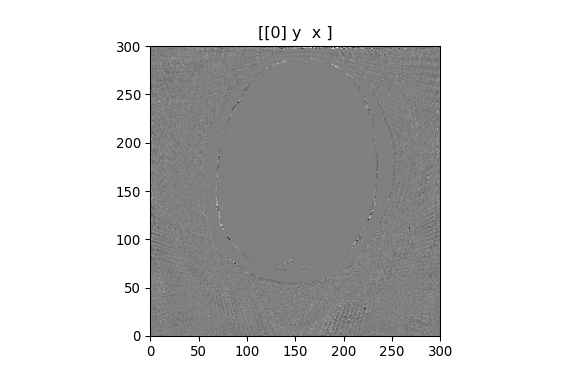

In [26]:
pl.ImagePlot(img_rec_now_2)

In [36]:
coor_subsample_2[:,:,1][None,:,:]

(512, 96)

In [34]:
rawdata_brain.shape

(12, 512, 96)

In [44]:
coor.shape

(512, 96, 2)

<IPython.core.display.Javascript object>


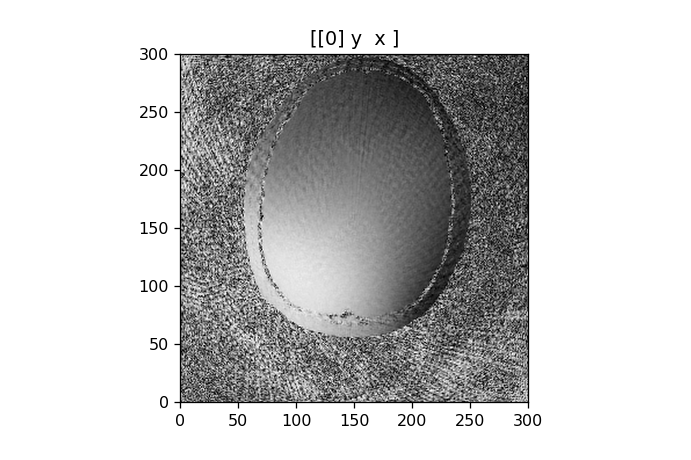

In [160]:
pl.ImagePlot(sens_maps_t)

<IPython.core.display.Javascript object>


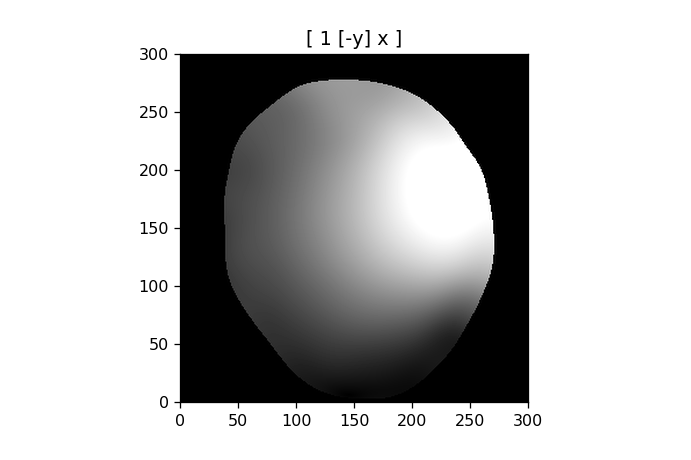

In [161]:
pl.ImagePlot(sens_map)

In [162]:
sens_maps_ecalib = sp.backend.to_device(sens_map,device=gpu_number)



MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s, max_eig=7.93E+01]

MaxEig:   3%|▎         | 1/30 [00:00<00:01, 19.79it/s, max_eig=5.67E+00]

MaxEig:   7%|▋         | 2/30 [00:00<00:01, 26.01it/s, max_eig=1.83E+01]

MaxEig:  10%|█         | 3/30 [00:00<00:00, 27.00it/s, max_eig=2.01E+01]

MaxEig:  13%|█▎        | 4/30 [00:00<00:00, 35.43it/s, max_eig=2.01E+01]

MaxEig:  13%|█▎        | 4/30 [00:00<00:00, 35.43it/s, max_eig=2.08E+01]

MaxEig:  17%|█▋        | 5/30 [00:00<00:00, 35.43it/s, max_eig=2.11E+01]

MaxEig:  20%|██        | 6/30 [00:00<00:00, 35.43it/s, max_eig=2.13E+01]

MaxEig:  23%|██▎       | 7/30 [00:00<00:00, 35.43it/s, max_eig=2.14E+01]

MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 33.25it/s, max_eig=2.14E+01]

MaxEig:  27%|██▋       | 8/30 [00:00<00:00, 33.25it/s, max_eig=2.15E+01]

MaxEig:  30%|███       | 9/30 [00:00<00:00, 33.25it/s, max_eig=2.15E+01]

MaxEig:  33%|███▎      | 10/30 [00:00<00:00, 33.25it/s, max_eig=2.15E+

LinearLeastSquares:  42%|████▏     | 42/100 [00:01<00:01, 32.06it/s, resid=2.06E-04]

LinearLeastSquares:  43%|████▎     | 43/100 [00:01<00:01, 32.06it/s, resid=1.96E-04]

LinearLeastSquares:  44%|████▍     | 44/100 [00:01<00:01, 32.06it/s, resid=1.86E-04]

LinearLeastSquares:  45%|████▌     | 45/100 [00:01<00:01, 30.97it/s, resid=1.86E-04]

LinearLeastSquares:  45%|████▌     | 45/100 [00:01<00:01, 30.97it/s, resid=1.77E-04]

LinearLeastSquares:  46%|████▌     | 46/100 [00:01<00:01, 30.97it/s, resid=1.69E-04]

LinearLeastSquares:  47%|████▋     | 47/100 [00:01<00:01, 30.97it/s, resid=1.61E-04]

LinearLeastSquares:  48%|████▊     | 48/100 [00:01<00:01, 30.97it/s, resid=1.54E-04]

LinearLeastSquares:  49%|████▉     | 49/100 [00:01<00:01, 30.32it/s, resid=1.54E-04]

LinearLeastSquares:  49%|████▉     | 49/100 [00:01<00:01, 30.32it/s, resid=1.47E-04]

LinearLeastSquares:  50%|█████     | 50/100 [00:01<00:01, 30.32it/s, resid=1.41E-04]

LinearLeastSquares:  51%|█████     | 51/100 [00:01<00:

<IPython.core.display.Javascript object>


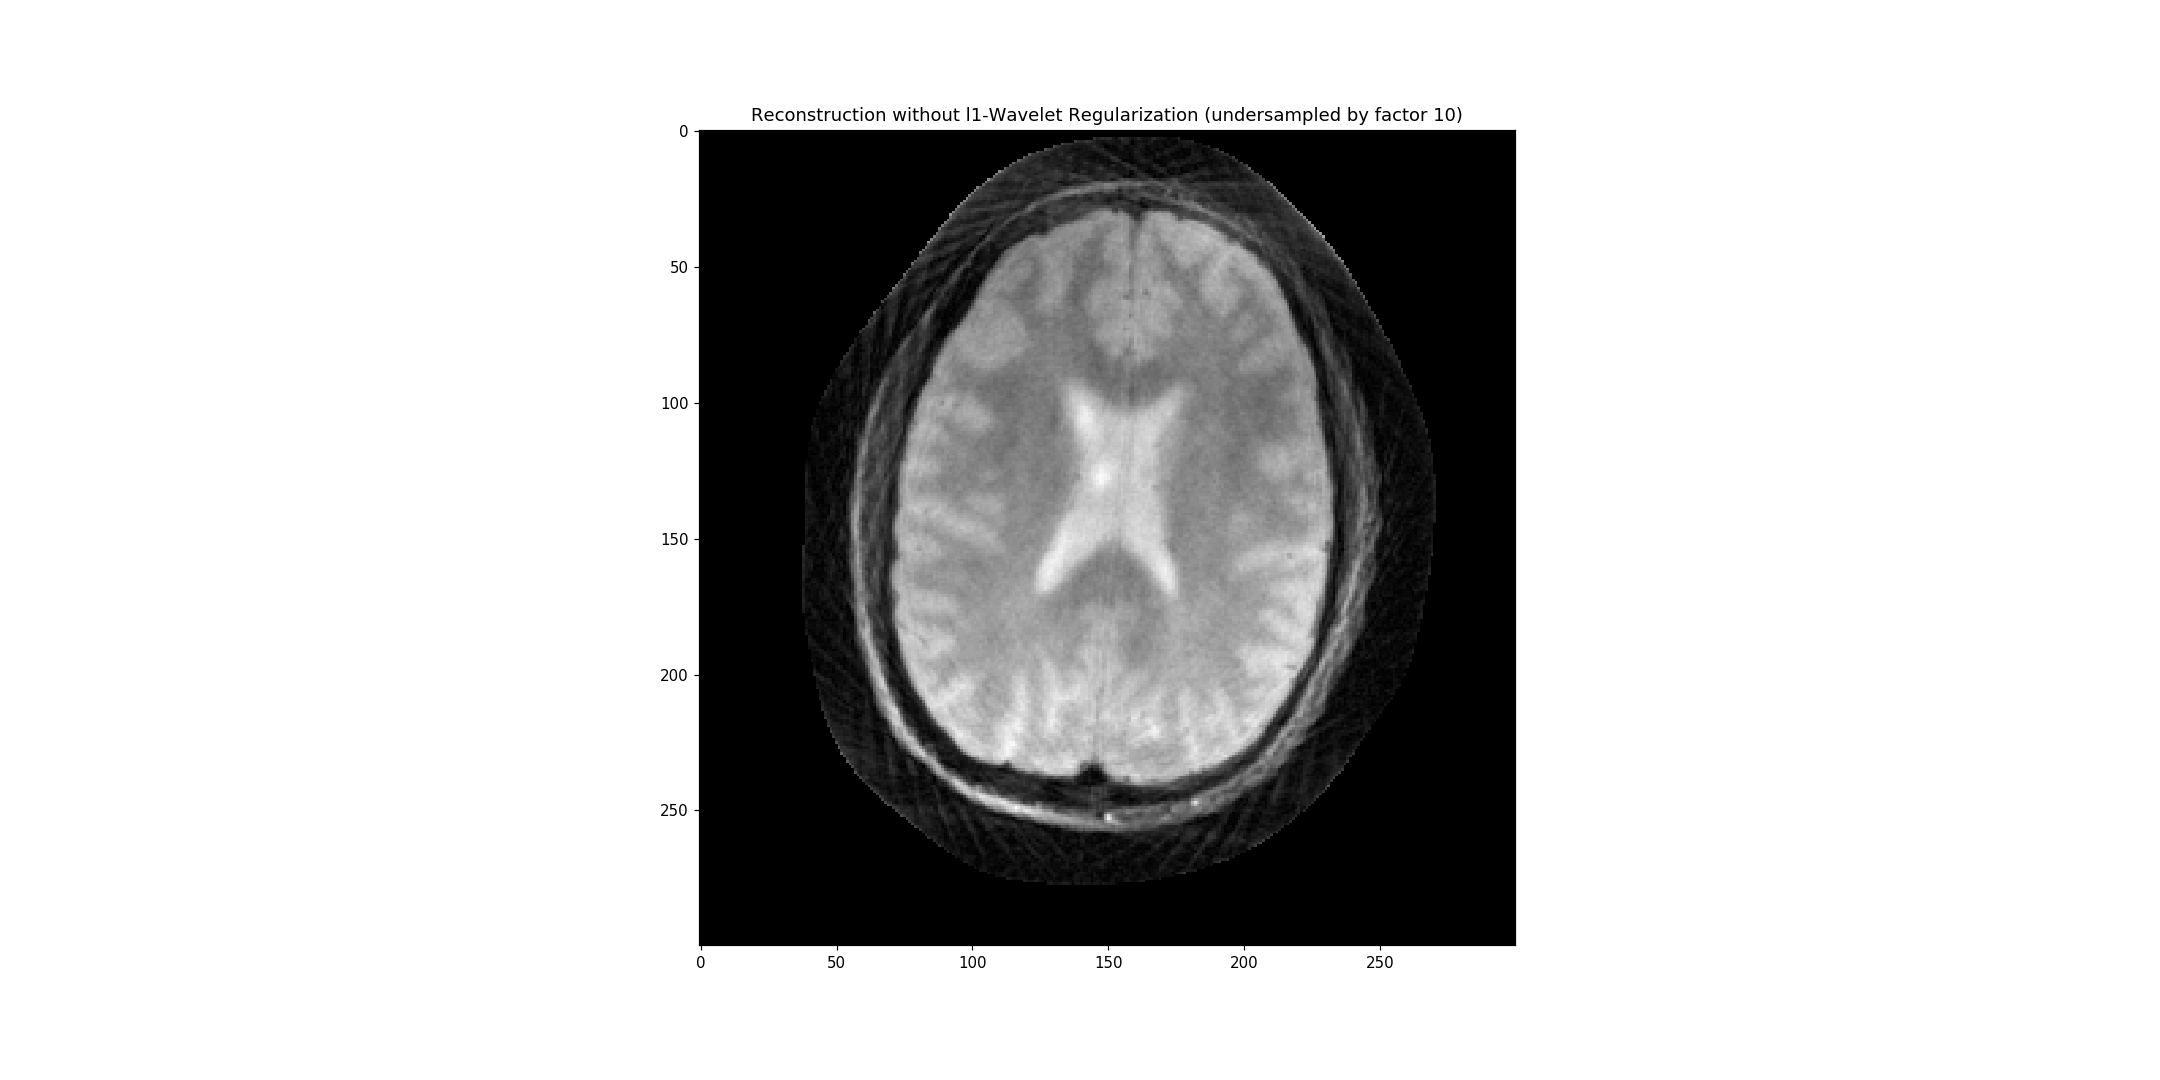

In [165]:
# Subsample of the radial data
#L_2 Normalization
lamda_l2 = 0.1
proxg_l2 = sp.prox.L2Reg((1,300,300),lamda_l2)
coor_subsample_2 = coor[:,::4,:]
# phase = np.exp(1j*np.pi*(0)*coor_subsample_2[:,:,0][None,:,:])
# phase = sp.backend.to_device(phase,gpu_number)
rawdata_brain_2 = rawdata_brain[:,:,::4]
rawdata_brain_2 = sp.backend.to_device(rawdata_brain_2,gpu_number)
# pl.ScatterPlot(coor_subsample_2)
S_2 = sp.linop.Multiply((1,300,300),sens_maps_ecalib)
NUFFT_2 = sp.linop.NUFFT((12,300,300),coor_subsample_2)
Operator_2 = NUFFT_2*S_2
img_rec_now_2 = sp.app.LinearLeastSquares(Operator_2,rawdata_brain_2,proxg=proxg_l2,max_iter=100).run()
img_rec_now_2 = sp.backend.to_device(img_rec_now_2)
im_abs_recon_now_2 = abs(img_rec_now_2[0,:,:])
plt.figure(figsize=(20,10))
plt.title("Reconstruction without l1-Wavelet Regularization (undersampled by factor %d)"%10)
plt.imshow(im_abs_recon_now_2[::-1,:],cmap='gray')
plt.show()